<a href="https://colab.research.google.com/github/adervish/random_public/blob/main/NYC_Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

hosp_live_url = 'https://health.data.ny.gov/api/views/jw46-jpb7/rows.csv?accessType=DOWNLOAD'
hosp_snapshot_url = 'https://raw.githubusercontent.com/adervish/random_public/main/2021_12_17_snapshot.csv'
hosp = pd.read_csv(hosp_snapshot_url)
hosp['As of Date']= pd.to_datetime(hosp['As of Date'])
testing_url = 'https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD'
testing = pd.read_csv(testing_url)
testing['Test Date']= pd.to_datetime(testing['Test Date'])

No handles with labels found to put in legend.


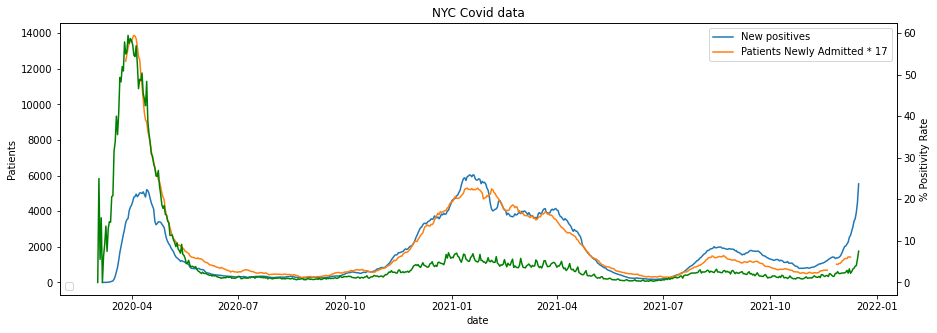

In [18]:
nyc_hosp = hosp[ hosp['NY Forward Region'] == 'NEW YORK CITY']
nh = nyc_hosp.groupby(['As of Date']).sum()
options = ['Kings', 'New York', 'Bronx', 'Queens', 'Richmond']
nyc = testing[ testing['County'].isin(options) ]
nyc = nyc.groupby('Test Date').sum()
merged = pd.merge(nh, nyc, how='outer', left_index=True, right_index=True)
#merged = merged.sort_values('Test Date')
merged['New Positives CMA 1'] = merged['New Positives'].rolling(7).mean()
merged['Patients Newly Admitted'] = merged['Patients Newly Admitted'].rolling(7).mean()
merged['Patients Newly Admitted'] = merged['Patients Newly Admitted'] * 17
merged['Positivity rate'] =  merged['New Positives'] / merged['Total Number of Tests Performed'] * 100
merged['Patients Newly Admitted'] = merged['Patients Newly Admitted'].shift(-5)

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(merged.index, merged['New Positives CMA 1'], label='New positives')
ax.plot(merged.index, merged['Patients Newly Admitted'], label='Patients Newly Admitted * 17')
ax.set_xlabel("date")
ax.set_ylabel("Patients")
ax2=ax.twinx()
ax2.plot(merged.index, merged['Positivity rate'], color="green")
ax2.set_ylabel('% Positivity Rate')
ax.legend(loc=1)
ax2.legend(loc=3)
plt.title('NYC Covid data')

plt.draw()

No handles with labels found to put in legend.


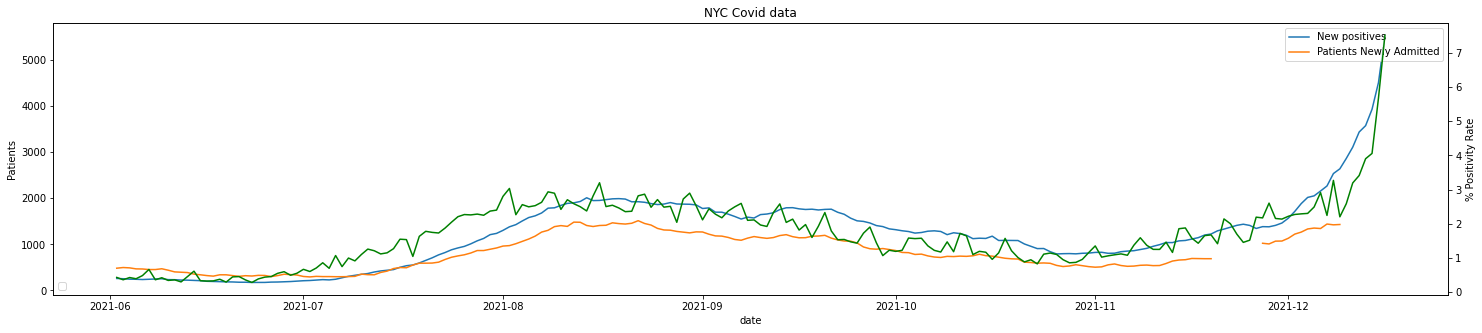

In [14]:

merged = pd.merge(nh, nyc, how='outer', left_index=True, right_index=True)
#merged = merged.sort_values('Test Date')
merged['New Positives CMA 1'] = merged['New Positives'].rolling(7).mean()
merged['Patients Newly Admitted'] = merged['Patients Newly Admitted'].rolling(7).mean()
merged['Patients Newly Admitted'] = merged['Patients Newly Admitted'] * 17
merged['Positivity rate'] =  merged['New Positives'] / merged['Total Number of Tests Performed'] * 100
merged['Patients Newly Admitted'] = merged['Patients Newly Admitted'].shift(-5)

chopped = merged[ merged.index.to_series() > '2021-06-01']
fig,ax = plt.subplots(figsize=(25,5))
ax.plot(chopped.index, chopped['New Positives CMA 1'], label='New positives')
ax.plot(chopped.index, chopped['Patients Newly Admitted'], label='Patients Newly Admitted')
ax.set_xlabel("date")
ax.set_ylabel("Patients")
ax2=ax.twinx()
ax2.plot(chopped.index, chopped['Positivity rate'], color="green")
ax2.set_ylabel('% Positivity Rate')
ax.legend(loc=1)
ax2.legend(loc=3)
plt.title('NYC Covid data')
plt.draw()

In [ ]:
list(merged.columns)

['Facility PFI',
 'Patients Currently Hospitalized',
 'Patients Newly Admitted',
 'Patients Positive After Admission',
 'Patients Discharged',
 'Patients Currently in ICU',
 'Patients Currently ICU Intubated',
 'Patients Expired',
 'Cumulative COVID-19 Discharges to Date',
 'Cumulative COVID-19 Fatalities to Date',
 'Total Staffed Beds',
 'Total Staffed Beds Currently Available',
 'Total Staffed ICU Beds',
 'Total Staffed ICU Beds Currently Available',
 'Total Staffed Acute Care Beds',
 'Total Staffed Acute Care Beds Occupied',
 'Total Staffed ICU Beds 1',
 'Total Staffed ICU Beds Currently Occupied',
 'Total New Admissions Reported',
 'Patients Age Less Than 1 Year',
 'Patients Age 1 To 4 Years',
 'Patients Age 5 to 19 Years',
 'Patients Age 20 to 44 Years',
 'Patients Age 45 to 54 Years',
 'Patients Age 55 to 64 Years',
 'Patients Age 65 to 74 Years',
 'Patients Age 75 to 84 Years',
 'Patients Age Greater Than 85 Years',
 'Hospitalized Indicator',
 'New Positives',
 'Cumulative Numbe

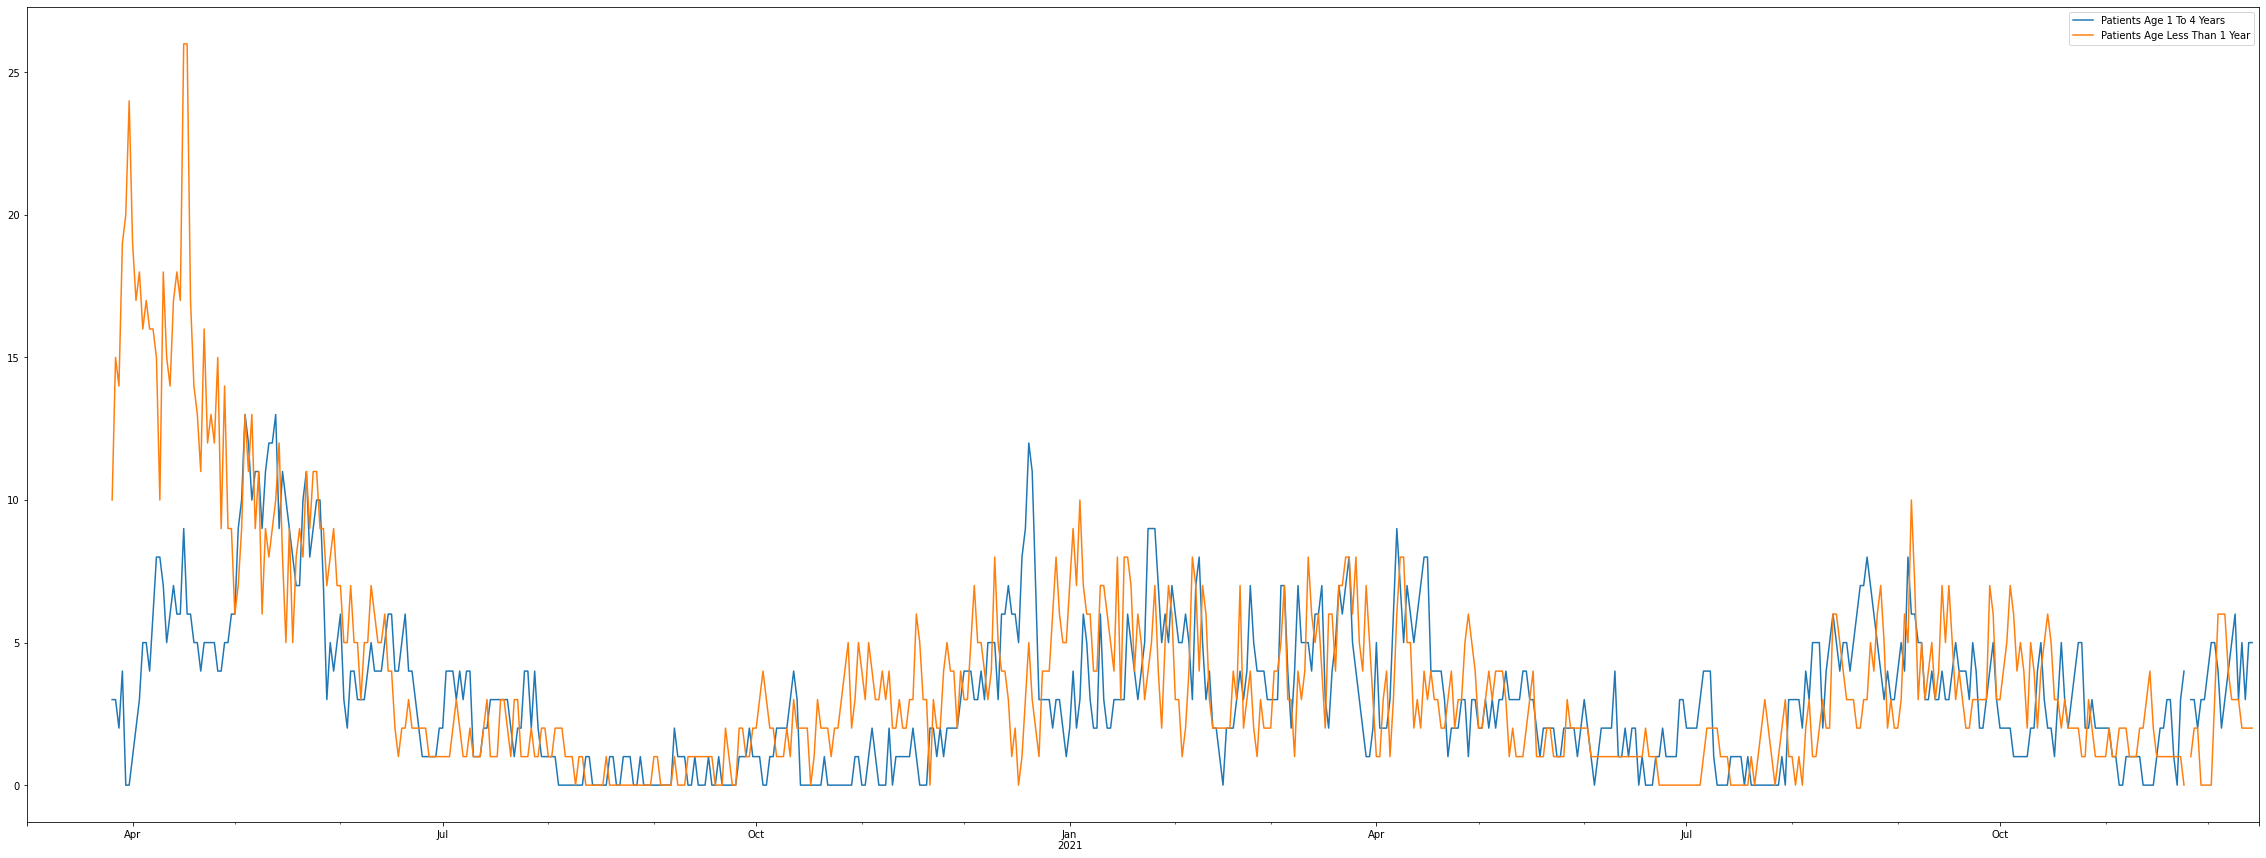

In [ ]:
merged.plot(y=['Patients Age 1 To 4 Years', 'Patients Age Less Than 1 Year'], figsize=(40,15))



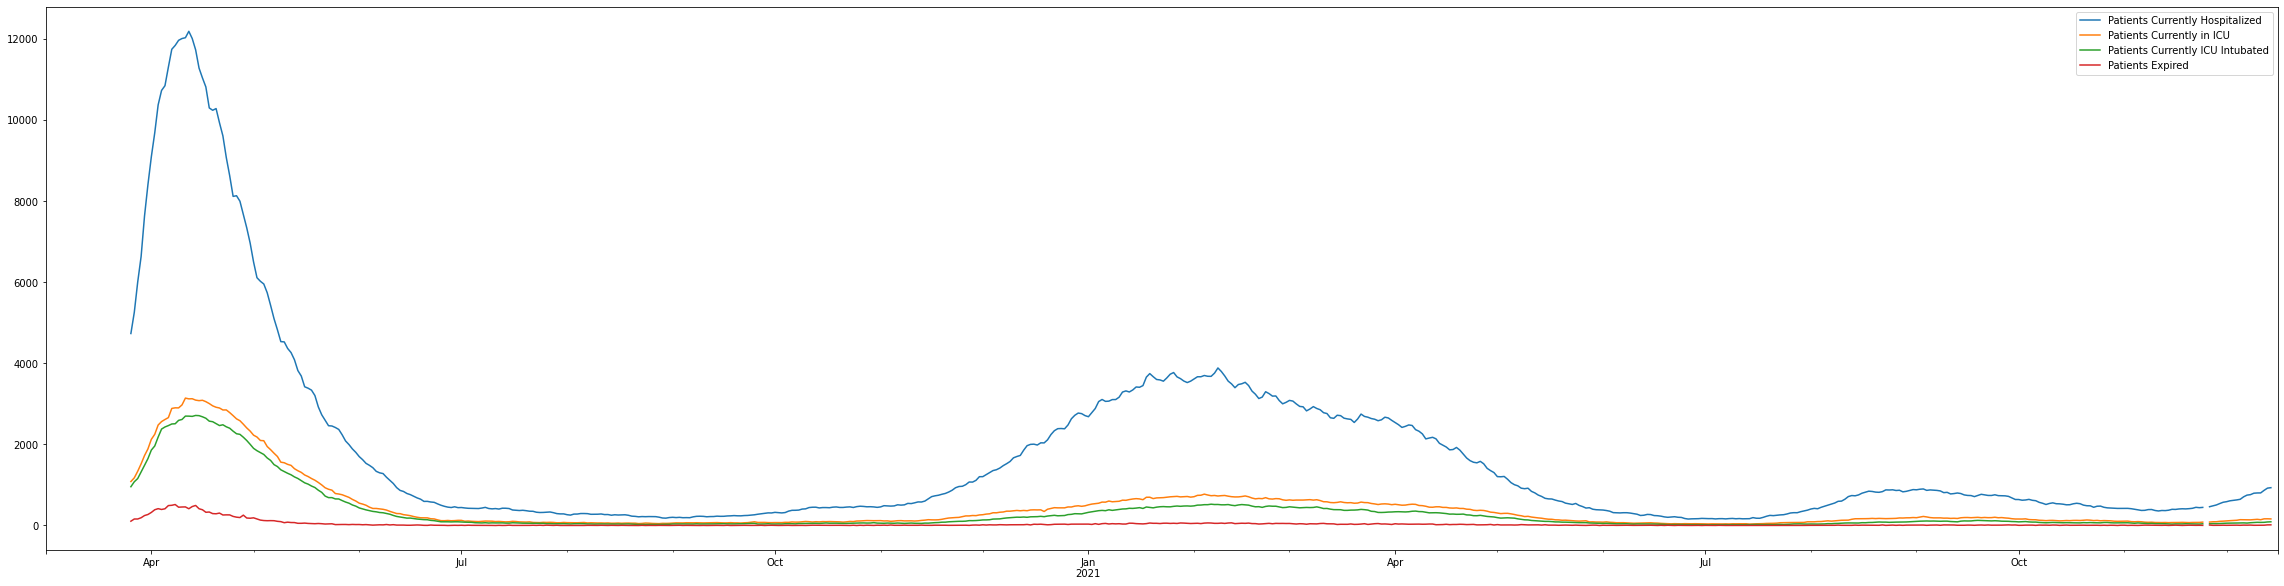

In [ ]:
merged.plot(figsize=(40,10), y=['Patients Currently Hospitalized', 'Patients Currently in ICU', 'Patients Currently ICU Intubated', 'Patients Expired'])

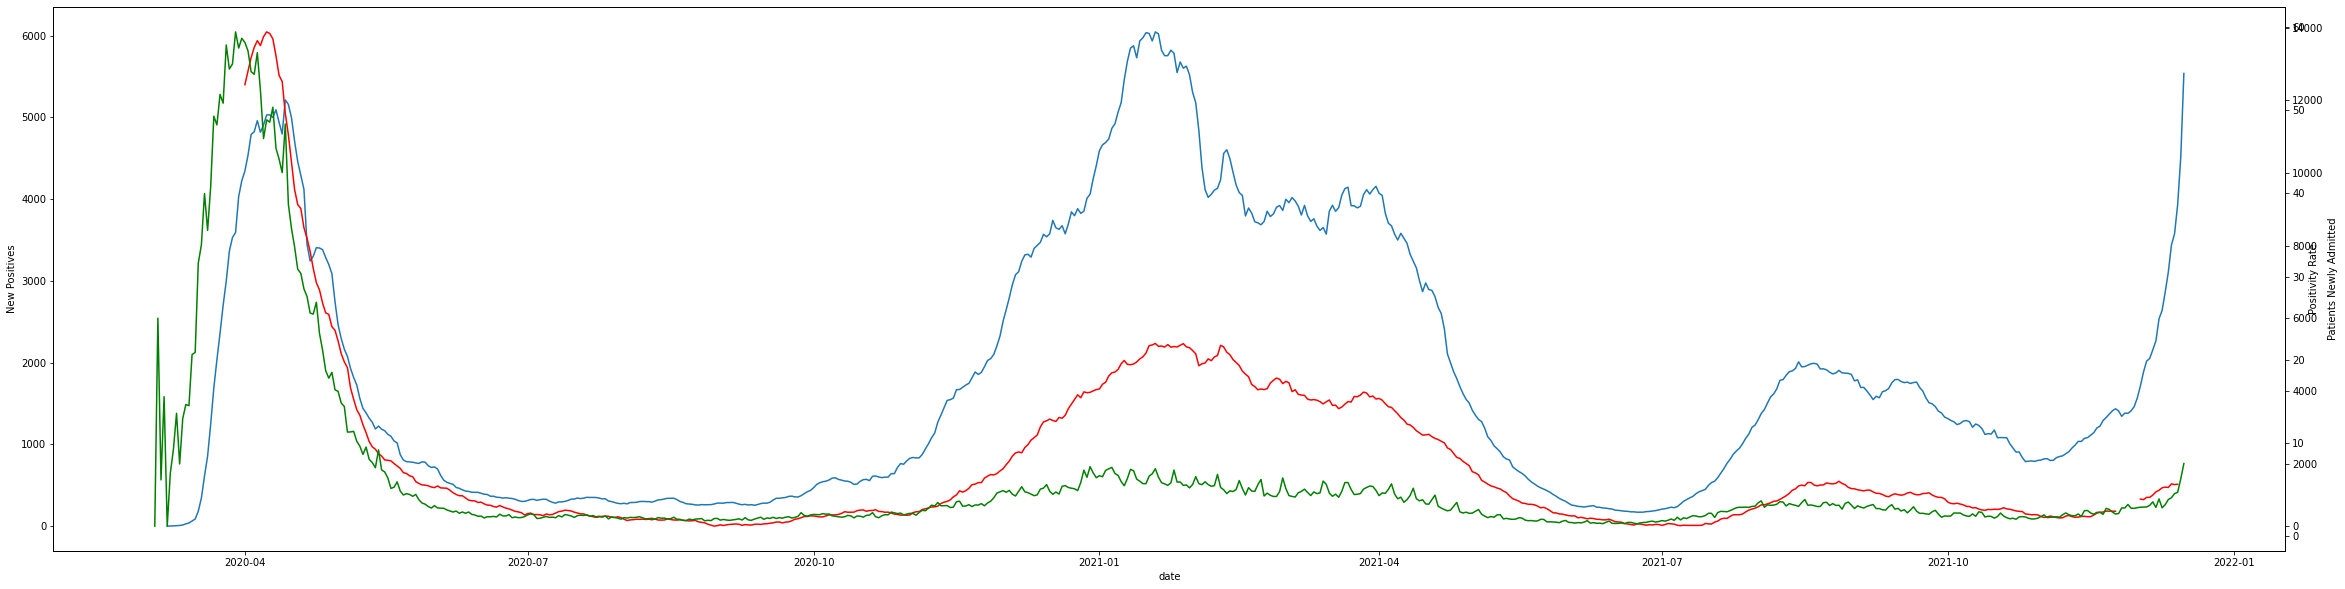

,Facility PFI,Patients Currently Hospitalized,Patients Newly Admitted,Patients Positive After Admission,Patients Discharged,Patients Currently in ICU,Patients Currently ICU Intubated,Patients Expired,Cumulative COVID-19 Discharges to Date,Cumulative COVID-19 Fatalities to Date,Total Staffed Beds,Total Staffed Beds Currently Available,Total Staffed ICU Beds,Total Staffed ICU Beds Currently Available,Total Staffed Acute Care Beds,Total Staffed Acute Care Beds Occupied,Total Staffed ICU Beds 1,Total Staffed ICU Beds Currently Occupied,Total New Admissions Reported,Patients Age Less Than 1 Year,Patients Age 1 To 4 Years,Patients Age 5 to 19 Years,Patients Age 20 to 44 Years,Patients Age 45 to 54 Years,Patients Age 55 to 64 Years,Patients Age 65 to 74 Years,Patients Age 75 to 84 Years,Patients Age Greater Than 85 Years,Hospitalized Indicator,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives CMA 1,Positivity rate
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN
2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,8,8,NaN,0.000000
2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,8,16,NaN,25.000000
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,36,52,NaN,5.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-12,574815.0,866.0,1440.142857,29.0,76.0,164.0,78.0,7.0,106502.0,21764.0,0.0,0.0,0.0,0.0,15588.0,11945.0,2138.0,1673.0,120.0,2.0,3.0,15.0,120.0,107.0,130.0,197.0,152.0,140.0,0.0,3824,1170385,112099,38270802,3439.428571,3.411270
2021-12-13,574815.0,921.0,1423.142857,36.0,63.0,165.0,87.0,15.0,106565.0,21779.0,0.0,0.0,0.0,0.0,15642.0,12078.0,2135.0,1664.0,110.0,2.0,5.0,13.0,139.0,109.0,139.0,200.0,165.0,149.0,0.0,3124,1173509,80037,38350839,3577.285714,3.903195
2021-12-14,574815.0,932.0,1430.428571,47.0,133.0,162.0,91.0,16.0,106698.0,21795.0,0.0,0.0,0.0,0.0,15599.0,12527.0,2140.0,1730.0,142.0,2.0,5.0,16.0,146.0,123.0,146.0,198.0,158.0,138.0,0.0,5084,1178593,125262,38476101,3933.571429,4.058693
2021-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8318,1186911,146366,38622467,4514.285714,5.683014


In [ ]:

fig,ax = plt.subplots(figsize=(40,10))
ax.plot(merged.index, merged['New Positives CMA 1'])
ax.set_xlabel("date")
ax.set_ylabel("New Positives")
ax2=ax.twinx()
ax2.plot(merged.index, merged['Patients Newly Admitted'], color="red")
ax2.set_ylabel('Patients Newly Admitted')
ax3=ax.twinx()
ax3.plot(merged.index, merged['Positivity rate'], color="green")
ax3.set_ylabel('Positivity Rate')

plt.show()

merged